## Assignment 3


### Goals

- First: the original hashtags have been blanked out from the tweet. Build a predictive model that can predict the hashtag used based on the rest of the tweet text
- Second: show that your model can make predictions in a deployed streaming setting using Spark


In [39]:
import os
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import nltk
import string
import wordcloud
import seaborn as sns
import spacy
import joblib

In [32]:
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [3]:
english_stemmer = SnowballStemmer('english')
nlp = spacy.load('es_core_news_sm')
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amgiraldov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
def tokenize1(text):
    doc = nlp(text)
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop]
    lexical_tokens = [t.lower() for t in words if t.isalpha()]
    return lexical_tokens


#### Load data

In [5]:
os.chdir('/Users/amgiraldov/OneDrive - KU Leuven/Advanced Analytics')
os.getcwd()

'/Users/amgiraldov/OneDrive - KU Leuven/Advanced Analytics'

In [11]:
# Load data from the training set
# ------------------------------------

df = pd.read_csv("tweet_00.csv", header = None)
df1 = pd.read_csv("tweet_01.csv", header = None)
df2 = pd.read_csv("tweet_02.csv", header = None)
df3 = pd.read_csv("tweet_03.csv", header = None)
df4 = pd.read_csv("tweet_04.csv", header = None)
df5 = pd.read_csv("tweet_05.csv", header = None)
df = pd.concat([df, df1, df2, df3, df4, df5]).drop_duplicates()

df.columns = ['label', 'tweet_id', 'tweet_text']
dummyTag = pd.get_dummies(df["label"])
dummyTag = pd.concat([df[["tweet_id","tweet_text"]], dummyTag], axis = 1).drop_duplicates()

# Multiclass models

In [12]:
data_train, data_test, train_labels, test_labels = train_test_split(df["tweet_text"], 
                                                                    df["label"],
                                                                    stratify = df["label"],
                                                                    test_size = 0.20)

In [13]:
vectorizer = TfidfVectorizer(ngram_range=(1,1), use_idf=True, tokenizer = tokenize1)

In [14]:
X_train = vectorizer.fit_transform(data_train)
X_test = vectorizer.transform(data_test)

In [16]:
   for classify in ((RidgeClassifier()),
                 (LinearSVC()),
                 (SGDClassifier()),
                 (RandomForestClassifier()),
                 (BernoulliNB())):
                  print('=' * 80)
                  print("Training: ")
                  print(classify)
                  classify.fit(X_train, train_labels)
                  pred = classify.predict(X_test)
                  score = metrics.accuracy_score(test_labels, pred)
                  print("accuracy:   %0.3f" % score)
                  print("classification report:")
                  print(metrics.classification_report(test_labels, pred))
                  print("confusion matrix:")
                  print(metrics.confusion_matrix(test_labels, pred))
                  print('=' * 80)
                  print()

Training: 
RidgeClassifier()
accuracy:   0.642
classification report:
                precision    recall  f1-score   support

        #biden       0.67      0.57      0.62       348
        #china       0.65      0.69      0.67       454
        #covid       0.59      0.61      0.60       540
    #inflation       0.83      0.45      0.59        75
#stopasianhate       0.80      0.66      0.72       180
      #vaccine       0.62      0.69      0.65       593

      accuracy                           0.64      2190
     macro avg       0.69      0.61      0.64      2190
  weighted avg       0.65      0.64      0.64      2190

confusion matrix:
[[197  57  42   3   9  40]
 [ 31 314  46   1   9  53]
 [ 26  38 330   2   4 140]
 [  7  14  12  34   0   8]
 [ 11  16  19   0 118  16]
 [ 20  46 107   1   7 412]]

Training: 
LinearSVC()
accuracy:   0.633
classification report:
                precision    recall  f1-score   support

        #biden       0.66      0.59      0.62       348
        

/opt/anaconda3/envs/Assignment3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/Assignment3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/Assignment3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GridSearch method 

In [20]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=10000)
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(X_train, train_labels)

print(grid.best_params_) 

/opt/anaconda3/envs/Assignment3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/Assignment3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/Assignment3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/Assignment3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the

/opt/anaconda3/envs/Assignment3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/Assignment3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/Assignment3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/envs/Assignment3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the

{'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'elasticnet'}


In [21]:
grid


GridSearchCV(cv=10, estimator=SGDClassifier(max_iter=10000),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log', 'squared_hinge',
                                  'modified_huber', 'perceptron'],
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']})

In [29]:
classify = SGDClassifier(alpha =  0.0001, loss = 'hinge', penalty = 'elasticnet')
#classify = SGDClassifier()

In [30]:
classify.fit(X_train, train_labels)
pred = classify.predict(X_test)
score = metrics.accuracy_score(test_labels, pred)
print("accuracy:   %0.3f" % score)
print("classification report:")
print(metrics.classification_report(test_labels, pred))
print("confusion matrix:")
print(metrics.confusion_matrix(test_labels, pred))

accuracy:   0.644
classification report:
                precision    recall  f1-score   support

        #biden       0.66      0.62      0.64       348
        #china       0.66      0.66      0.66       454
        #covid       0.61      0.59      0.60       540
    #inflation       0.80      0.43      0.56        75
#stopasianhate       0.75      0.70      0.72       180
      #vaccine       0.61      0.71      0.66       593

      accuracy                           0.64      2190
     macro avg       0.68      0.62      0.64      2190
  weighted avg       0.65      0.64      0.64      2190

confusion matrix:
[[216  48  33   2  11  38]
 [ 38 299  45   1  15  56]
 [ 28  32 318   2   7 153]
 [ 11  13  10  32   1   8]
 [ 13  11  19   0 126  11]
 [ 19  47  97   3   8 419]]


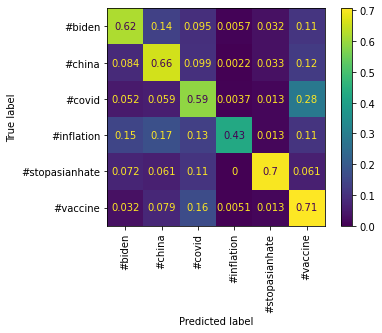

In [38]:
plot_confusion_matrix(classify, X_test, test_labels,  normalize = 'true', xticks_rotation = 'vertical')  


# Saving the trained models

In [40]:
joblib.dump(vectorizer, "vectorizer.joblib")
joblib.dump(classify, "classifier.joblib")

['classifier.joblib']